# GIS con GEOPANDAS 

## Instalación y compilación de paquetes necesarios 

In [ ]:
!apt-get install -qq curl g++ make

In [157]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

/bin/bash: línea 1: ./configure: No existe el archivo o el directorio


In [ ]:
import os
os.chdir('spatialindex-src-1.8.5')


In [ ]:
!./configure

In [ ]:
!make

In [ ]:
!make install

In [ ]:
!pip install rtree

In [ ]:
!ldconfig

In [ ]:
#!pip install geopandas
#!pip install pyproj rtree
#!pip install pygeos

In [160]:
# import xlrd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG

In [161]:
from rtree import index
from rtree.index import Rtree

## Test

In [162]:
df = gpd.read_file('data/departamento.zip')

<Figure size 1440x864 with 0 Axes>

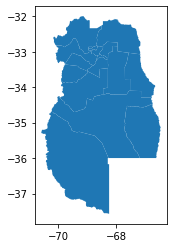

In [163]:
plt.figure(figsize=(20,12))
mendoza = df.loc[df['fdc'] == 'IDE Mendoza']
mendoza.plot();

In [164]:
tables=pd.read_html('https://es.wikipedia.org/wiki/Anexo:Municipios_de_la_provincia_de_Mendoza')

In [165]:
type(tables)

list

In [166]:
tables[0]

,Municipio (departamento),Cabecera,Fecha de creación del departamento,Origen,Códigos INDEC:divisiones político-administrativas/ gobiernos locales[2]​[3]​,Población (2010)[4]​,Superficie (km²),Densidad (hab./km²),Distritos,Delegaciones municipales,Mapa,Número de concejales
0,General Alvear,General Alvear,12 de agosto de 1914 (ley n.º 635)[5]​,Con tierras del departamento San Rafael,50014/500014,46 429,14 448,3.21,4,* Alvear Oeste* Bowen* San Pedro del Atuel[6]​,NaN,10
1,Godoy Cruz,Godoy Cruz,11 de mayo de 1855,Sus nombres anteriores fueron San Vicente y Be...,50021/500021,191 903,75,2558.71,9[7]​,NaN,NaN,12
2,Guaymallén,Villa Nueva,14 de mayo de 1858 (decreto)[8]​,NaN,50028/500028,283 803,164,1730.51,21,"* Dorrego* Rodeo de la Cruz, Kilómetro 8 y Kil...",NaN,12
3,Junín,Junín,18 de enero de 1859[10]​,NaN,50035/500035,37 859,263,143.95,10,* La Colonia* Los Barriales* Medrano* Phillips...,NaN,10
4,La Paz,La Paz,18 de noviembre de 1855 (promulgación de la co...,Es uno de los 4 departamentos originales,50042/500042,10 012,7105,1.41,6,NaN,NaN,10
5,Las Heras,Las Heras,31 de enero de 1871 (decreto),Con tierras del departamento Capital,50049/500049,203 666,8955,22.74,14,* El Borbollón[12]​* El Challao* El Algarrobal...,NaN,12
6,Lavalle,Villa Tulumaya,18 de enero de 1859 (decreto),Hasta 1889 su nombre fue Rosario de las Laguna...,50056/500056,36 738,10 212,3.60,24,* Alto del Olvido[14]​ (distritos: Alto del Ol...,NaN,10
7,Luján de Cuyo,Luján de Cuyo,18 de noviembre de 1855 (promulgación de la co...,"Es uno de los 4 departamentos originales, con ...",50063/500063,119 888,4847,24.73,15,* Agrelo* Cacheuta y Potrerillos* Carrodilla y...,NaN,12[17]​
8,Maipú,Maipú,14 de mayo de 1858,NaN,50070/500070,172 332,617,279.31,12,* Coquimbito[18]​* Fray Luis Beltrán * General...,NaN,12
9,Malargüe,Malargüe,16 de noviembre de 1850,Con tierras del departamento San Rafael,50077/500077,27 660,41 317,0.67,4,* Agua Escondida (distrito Agua Escondida)[19]...,NaN,10


In [167]:
table = tables[0]

In [168]:
table.rename(columns = {
                      'Municipio (departamento)': 'departamento',
                      'Población (2010)[4]​': 'poblacion_2010',
                      'Superficie (km²)': 'Superficie_km2', 
                      'Densidad (hab./km²)':'densidad',
                      'Distritos':'distritos',
                      'Número de concejales':'concejales'}, 
                inplace = True)


In [169]:
table.columns

Index(['departamento', 'Cabecera', 'Fecha de creación del departamento',
       'Origen',
       'Códigos INDEC:divisiones político-administrativas/ gobiernos locales[2]​[3]​',
       'poblacion_2010', 'Superficie_km2', 'densidad', 'distritos',
       'Delegaciones municipales', 'Mapa', 'concejales'],
      dtype='object')

In [170]:
table = table[['departamento', 'poblacion_2010', 'Superficie_km2', 'densidad', 'distritos', 'concejales']]

In [171]:
map = pd.merge(mendoza, 
               table,
              left_on = 'nam',
              right_on = 'departamento',
              how= 'left')

In [172]:
map.loc[map['departamento'].isna()]

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry,departamento,poblacion_2010,Superficie_km2,densidad,distritos,concejales
15,336,Departamento,Departamento Capital,Departamento,Capital,50007,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.82047 -32.87394, -68.82549...",NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
table.loc[table['departamento'] == 'Mendoza (municipio)/ Capital (departamento)' , 'departamento'] = 'Capital'

In [174]:
map = pd.merge(mendoza, 
               table,
               left_on = 'nam',
               right_on = 'departamento',
               how= 'left')

In [175]:
map.columns

Index(['gid', 'objeto', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry',
       'departamento', 'poblacion_2010', 'Superficie_km2', 'densidad',
       'distritos', 'concejales'],
      dtype='object')

In [176]:
map = map[['gid', 'nam', 'geometry','poblacion_2010', 'Superficie_km2', 'densidad',
       'distritos', 'concejales']]

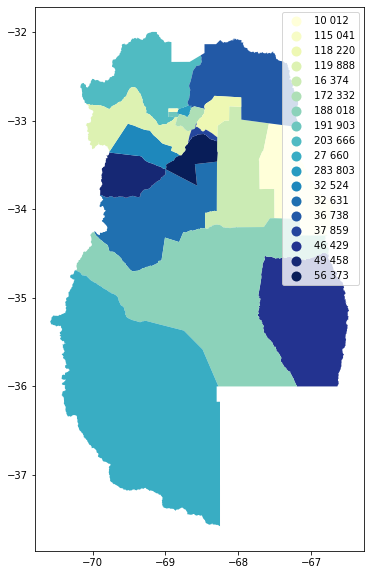

In [177]:
map.plot(column = 'poblacion_2010',
         legend = True,
         figsize=(10, 10),
         cmap='YlGnBu',
        );

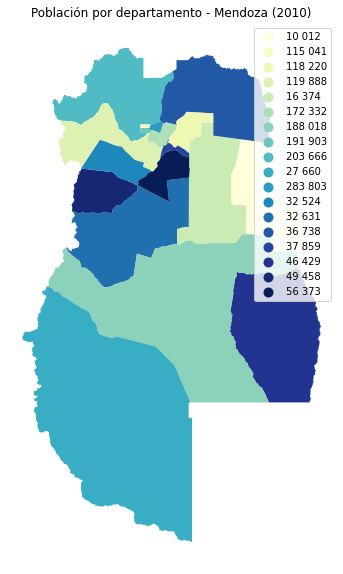

In [178]:
# Colormaps = https://matplotlib.org/stable/tutorials/colors/colormaps.html# plt.set_cmap('jet')
fig, ax = plt.subplots(figsize=(10, 10))

map.plot(column = 'poblacion_2010',
         legend = True,
         cmap='YlGnBu',
         ax = ax
        );
ax.set(title='Población por departamento - Mendoza (2010)')

ax.set_axis_off()
plt.show()

#### Localidades censales 

https://datos.gob.ar/ar/dataset/jgm-servicio-normalizacion-datos-geograficos/archivo/jgm_8.9

In [179]:
localidades = pd.read_csv('https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.29/download/localidades-censales.csv')

In [180]:
localidades = localidades.loc[localidades['provincia_nombre']=='Mendoza']

In [181]:
localidades = localidades[['centroide_lat','centroide_lon', 'nombre']]

In [182]:
localidades

,centroide_lat,centroide_lon,nombre
2053,-32.886969,-68.854308,Mendoza
2054,-35.000912,-67.516182,Bowen
2055,-35.144906,-67.662955,Carmensa
2056,-34.980469,-67.700995,General Alvear
2057,-34.979260,-67.659089,Los Compartos
...,...,...,...
2200,-33.370655,-69.192349,El Peral
2201,-33.398950,-69.105737,El Zampal
2202,-33.368827,-69.124736,La Arboleda
2203,-33.306845,-69.164578,San José


In [183]:
localidades

,centroide_lat,centroide_lon,nombre
2053,-32.886969,-68.854308,Mendoza
2054,-35.000912,-67.516182,Bowen
2055,-35.144906,-67.662955,Carmensa
2056,-34.980469,-67.700995,General Alvear
2057,-34.979260,-67.659089,Los Compartos
...,...,...,...
2200,-33.370655,-69.192349,El Peral
2201,-33.398950,-69.105737,El Zampal
2202,-33.368827,-69.124736,La Arboleda
2203,-33.306845,-69.164578,San José


In [184]:
gdf_localidades = gpd.GeoDataFrame(localidades, 
                                   geometry=gpd.points_from_xy(localidades['centroide_lon'], 
                                                               localidades['centroide_lat']),
                                   crs='EPSG:4326')

In [185]:
gdf_localidades

,centroide_lat,centroide_lon,nombre,geometry
2053,-32.886969,-68.854308,Mendoza,POINT (-68.85431 -32.88697)
2054,-35.000912,-67.516182,Bowen,POINT (-67.51618 -35.00091)
2055,-35.144906,-67.662955,Carmensa,POINT (-67.66296 -35.14491)
2056,-34.980469,-67.700995,General Alvear,POINT (-67.70100 -34.98047)
2057,-34.979260,-67.659089,Los Compartos,POINT (-67.65909 -34.97926)
...,...,...,...,...
2200,-33.370655,-69.192349,El Peral,POINT (-69.19235 -33.37066)
2201,-33.398950,-69.105737,El Zampal,POINT (-69.10574 -33.39895)
2202,-33.368827,-69.124736,La Arboleda,POINT (-69.12474 -33.36883)
2203,-33.306845,-69.164578,San José,POINT (-69.16458 -33.30685)


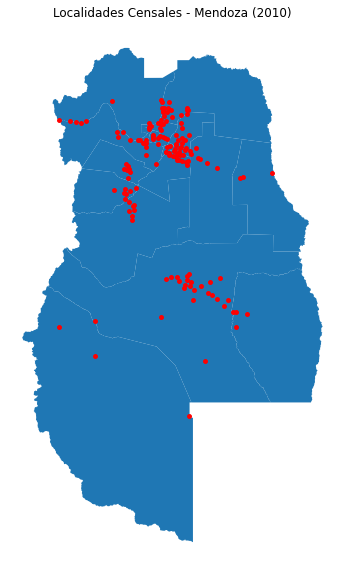

In [186]:

fig, ax = plt.subplots(figsize=(10, 10))

map.plot(ax = ax);

gdf_localidades.plot(marker='o', color='red', markersize=15, ax = ax);

ax.set(title='Localidades Censales - Mendoza (2010)')

ax.set_axis_off()
plt.show()

### Contextily

http://darribas.org/gds19/content/labs/lab_03.html

In [187]:
#!pip install contextily

In [188]:
import contextily as cx

In [189]:
map_crs = map.to_crs(epsg=3857)
gdf_loc = gdf_localidades.to_crs(epsg=3857)

In [190]:
map

,gid,nam,geometry,poblacion_2010,Superficie_km2,densidad,distritos,concejales
0,220,Las Heras,"MULTIPOLYGON (((-69.12645 -32.00191, -69.12570...",203 666,8955,22.74,14,12
1,213,San Carlos,"MULTIPOLYGON (((-68.45348 -34.21255, -68.45584...",32 631,11 578,2.82,6,10
2,214,Tunuyán,"MULTIPOLYGON (((-68.99859 -33.54164, -68.99862...",49 458,3317,14.91,12,10
3,92,Tupungato,"MULTIPOLYGON (((-68.79835 -33.39054, -68.79835...",32 524,2485,13.09,13,10
4,52,Santa Rosa,"MULTIPOLYGON (((-67.95776 -32.84504, -67.95774...",16 374,8510,1.92,6,10
5,53,Rivadavia,"MULTIPOLYGON (((-68.28922 -33.23243, -68.29025...",56 373,2141,26.33,13,10
6,55,La Paz,"MULTIPOLYGON (((-67.17696 -33.07321, -67.17605...",10 012,7105,1.41,6,10
7,111,General Alvear,"MULTIPOLYGON (((-66.75741 -34.51179, -66.75688...",46 429,14 448,3.21,4,10
8,113,San Rafael,"MULTIPOLYGON (((-66.77655 -34.29767, -66.77665...",188 018,31 235,6.02,18,12
9,215,Luján de Cuyo,"MULTIPOLYGON (((-68.86869 -32.96118, -68.86828...",119 888,4847,24.73,15,12[17]​


In [191]:
dep = map.loc[(map['nam']=='Las Heras') | (map['nam']=='Maipú') | (map['nam']=='Malargüe') ]

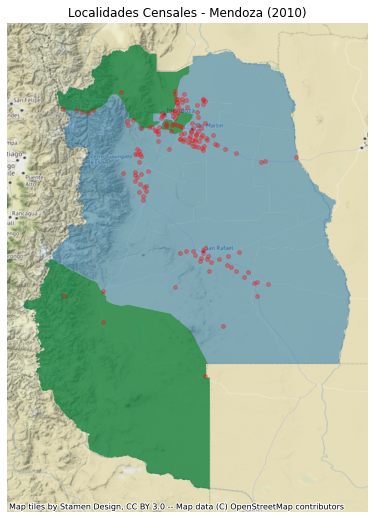

In [192]:
f, ax = plt.subplots(1, figsize=(9, 9))
map.plot(ax = ax, alpha=0.5)
dep.plot(ax=ax, facecolor = 'green', alpha = 0.5)
gdf_localidades.plot(alpha=0.3, marker='o', color='red', markersize=15, ax=ax)
cx.add_basemap(ax, crs=gdf_localidades.crs)
ax.set(title='Localidades Censales - Mendoza (2010)');
ax.set_axis_off()


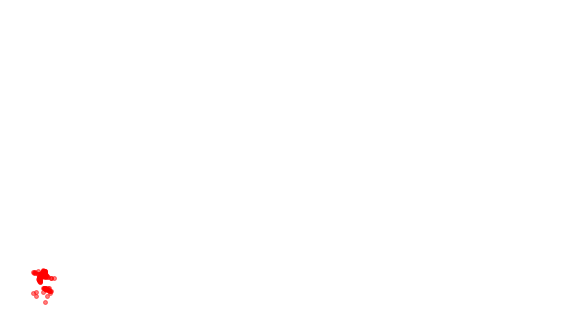

In [193]:
fig, ax = plt.subplots(figsize=(10, 10))
# cx.add_basemap(ax, crs = 'EPSG:4326')
map.plot(ax = ax, alpha=0.1);
gdf_loc.plot(marker='o', color='red', markersize=15, ax = ax, alpha=0.5);


ax.set_axis_off()
plt.show()


### Geocoding

[Documentacion](https://automating-gis-processes.github.io/site/notebooks/L3/geocoding_in_geopandas.html)

In [90]:
from geopandas.tools import geocode

In [92]:
tabla = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Universidades_nacionales_de_Argentina', header =1)

In [93]:
universidades  = tabla[0]

In [94]:
universidades

,Nombre,Acrónimo,Dirección,Ciudad,Provincia,Otras sedes,Sitio oficial,Estudiantes (2014)[9]​,Creación
0,Universidad de Buenos Aires,UBA,Viamonte 430,Buenos Aires,Ciudad de Buenos Aires,NaN,www.uba.ar,315 754,1821
1,Universidad de la Defensa Nacional,UNDEF,Maipú 262,Buenos Aires,Ciudad de Buenos Aires,NaN,www.undef.edu.ar,NaN,2014
2,Universidad Nacional Almirante Guillermo Brown,UNAB,Av. Tomás Espora 4320,Burzaco,Buenos Aires,NaN,www.unab.edu.ar,NaN,2016
3,Universidad Nacional Arturo Jauretche,UNAJ,Av. San Martín 2002,Florencio Varela,Buenos Aires,"Castelli, Lobos, Brandsen",www.unaj.edu.ar,10 825,2009
4,Universidad Nacional de Avellaneda,UNDAV,España 350 esq. Colón,Avellaneda,Buenos Aires,Piñeyro,www.undav.edu.ar,5617,2009
5,Universidad Nacional de Catamarca,UNCa,Esquiú 612,Catamarca,Catamarca,NaN,www.unca.edu.ar,11 614,1972
6,Universidad Nacional de Chilecito,UNChiUNdeC,9 de Julio 22,Chilecito,La Rioja,NaN,www.undec.edu.ar,3677,2002
7,Universidad Nacional de Córdoba,UNC,Haya de la Torre s/nPabellón Argentina,Córdoba,Córdoba,NaN,www.unc.edu.ar,110 990,1613
8,Universidad Nacional de Cuyo,UNCuUNCuyo,Centro Universitario,Mendoza,Mendoza,NaN,www.uncu.edu.ar,32 425,1939
9,Universidad Nacional de Entre Ríos,UNER,Eva Perón 24,Concepción del Uruguay,Entre Ríos,"Concordia, Gualeguaychú, Oro Verde, Paraná, Vi...",www.uner.edu.ar,15 225,1973


In [95]:
universidades['addr'] = universidades['Dirección'] + ', ' + universidades['Ciudad'] + ', ' + universidades['Provincia'] + ', Argentina'

In [96]:
universidades.columns

Index(['Nombre', 'Acrónimo', 'Dirección', 'Ciudad', 'Provincia', 'Otras sedes',
       'Sitio oficial', 'Estudiantes (2014)[9]​', 'Creación', 'addr'],
      dtype='object')

In [97]:
universidades = universidades[['Nombre', 'Acrónimo', 'addr']]

In [98]:
universidades

,Nombre,Acrónimo,addr
0,Universidad de Buenos Aires,UBA,"Viamonte 430, Buenos Aires, Ciudad de Buenos A..."
1,Universidad de la Defensa Nacional,UNDEF,"Maipú 262, Buenos Aires, Ciudad de Buenos Aire..."
2,Universidad Nacional Almirante Guillermo Brown,UNAB,"Av. Tomás Espora 4320, Burzaco, Buenos Aires, ..."
3,Universidad Nacional Arturo Jauretche,UNAJ,"Av. San Martín 2002, Florencio Varela, Buenos ..."
4,Universidad Nacional de Avellaneda,UNDAV,"España 350 esq. Colón, Avellaneda, Buenos Aire..."
5,Universidad Nacional de Catamarca,UNCa,"Esquiú 612, Catamarca, Catamarca, Argentina"
6,Universidad Nacional de Chilecito,UNChiUNdeC,"9 de Julio 22, Chilecito, La Rioja, Argentina"
7,Universidad Nacional de Córdoba,UNC,"Haya de la Torre s/nPabellón Argentina, Córdob..."
8,Universidad Nacional de Cuyo,UNCuUNCuyo,"Centro Universitario, Mendoza, Mendoza, Argentina"
9,Universidad Nacional de Entre Ríos,UNER,"Eva Perón 24, Concepción del Uruguay, Entre Rí..."


In [100]:
# Geocode addresses using Nominatim. Remember to provide a custom "application name" in the user_agent parameter!
geo = geocode(universidades['addr'], provider='nominatim', user_agent='autogis_xx', timeout=4)

In [101]:
geo

,geometry,address
0,POINT (-58.37312 -34.59977),"430, Viamonte, San Nicolás, Buenos Aires, Comu..."
1,POINT (-58.37663 -34.60514),"262, Maipú, San Nicolás, Buenos Aires, Comuna ..."
2,GEOMETRYCOLLECTION EMPTY,None
3,POINT (-58.28136 -34.77437),"Avenida San Martín, San Emilio, Florencio Vare..."
4,GEOMETRYCOLLECTION EMPTY,None
5,POINT (-65.76845 -28.46615),"Esquiú, Policía Federal, Jorge Bermudez, San F..."
6,POINT (-67.49450 -29.16495),"22, 9 de Julio, Barrio Mayo, Chilecito, Depart..."
7,GEOMETRYCOLLECTION EMPTY,None
8,POINT (-68.47269 -33.20158),"Centro universitario Rivadavia, Jose Hernandez..."
9,GEOMETRYCOLLECTION EMPTY,None


In [116]:

uni = geo.join(universidades)

In [118]:
type(uni)

geopandas.geodataframe.GeoDataFrame

In [ ]:
gdf_uni = gpd.GeoDataFrame(localidades, 
                                   geometry=gpd.points_from_xy(localidades['centroide_lon'], 
                                                               localidades['centroide_lat']),
                                   crs='EPSG:4326')

In [109]:
prov = gpd.read_file('data/provincia.zip')

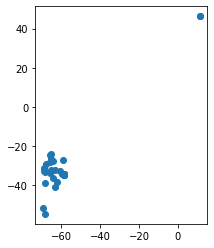

In [119]:
uni.plot();

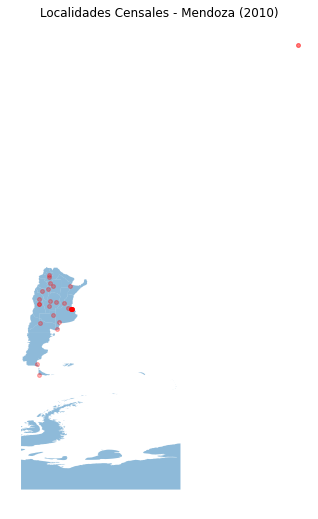

In [126]:
f, ax = plt.subplots(1, figsize=(9, 9))
prov.plot(ax = ax, alpha=0.5)
# dep.plot(ax=ax, facecolor = 'green', alpha = 0.5)
uni.plot(alpha=0.3, marker='o', color='red', markersize=15, ax=ax)
#cx.add_basemap(ax, crs=gdf_localidades.crs)
ax.set(title='Localidades Censales - Mendoza (2010)')

ax.set_axis_off();

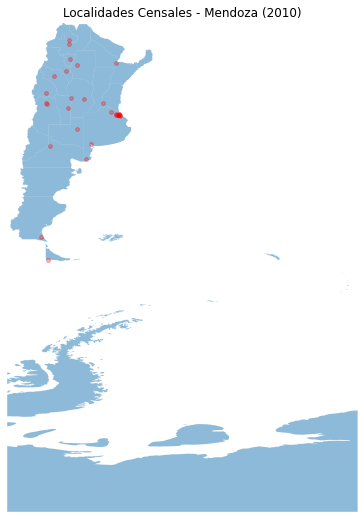

In [124]:
f, ax = plt.subplots(1, figsize=(9, 9))
prov.plot(ax = ax, alpha=0.5)
# dep.plot(ax=ax, facecolor = 'green', alpha = 0.5)
uni.plot(alpha=0.3, marker='o', color='red', markersize=15, ax=ax)
#cx.add_basemap(ax, crs=gdf_localidades.crs)
ax.set(title='Localidades Censales - Mendoza (2010)')
ax.set_ylim(prov.bounds.miny.min(), prov.bounds.maxy.max())
ax.set_xlim(prov.bounds.minx.min(), prov.bounds.maxx.max())
ax.set_axis_off();

### Operaciones espaciales

In [159]:
### https://towardsdatascience.com/how-to-easily-join-data-by-location-in-python-spatial-join-197490ff3544

# 1- Puntos
# df = pd.read_csv('/home/mato/Documentos/Datos/EDA/Walter/prestadores_CB3_DATA_STUDIO_QGIS_IV.csv')

# 2 - Conversión a Geopandas Geodataframe
# gdf_df = gpd.GeoDataFrame(df,   
#                           geometry=gpd.points_from_xy(df.DirGeoX, df.DirGeoY))

# 3 - Capa de barrios
# barrios = gpd.read_file('/home/mato/Documentos/Datos/EDA/mapas/barriosCABA/barrios_badata.shp')

# barrios.crs = barrios.to_crs("EPSG:4326")
# gdf_df.crs = gdf_df.to_crs("epsg:3395") #Mercator-projection

uni.crs = "EPSG:4326"
prov.crs = 'EPSG:4326'

# Hacemos el spatial join
sjoined_df = gpd.sjoin(uni, prov, op='within')

/home/mato/jupyter/jupyterenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [156]:
!apt-get install libspatialindex-dev

E: No se pudo abrir el fichero de bloqueo «/var/lib/dpkg/lock-frontend» - open (13: Permiso denegado)
E: No se pudo obtener el bloqueo de la interfaz dpkg (/var/lib/dpkg/lock-frontend). ¿Es usted superusuario?
